### ADVANCED STATISTICS FOR PHYSICS ANALYSIS, Physics of Data
###  Student: Matteo Guida 
### ID Number: 1211201

# Sheet 6

## Exercise 1

In [1]:
options(warn=-1)
mu.true.positive <- 0.95
mu.false.positive <- 0.02
beam.pi<-0.9
beam.mu<-0.1
prob.1<-(beam.mu*mu.true.positive)/(mu.false.positive*beam.pi+beam.mu*mu.true.positive)
prob.2<-(beam.mu*mu.true.positive)/(mu.false.positive*beam.pi)
cat(paste("Prob trigger fired by a mu :",prob.1),"\n")
cat(paste("S/N ratio :",prob.2))

Prob trigger fired by a mu : 0.84070796460177 
S/N ratio : 5.27777777777778

## Exercise 2

In [2]:
options(warn=-1)
install.packages("faraway") 
install.packages("GGally")
install.packages("ellipse") 
install.packages("RColorBrewer")
install.packages("PerformanceAnalytics") 

Installing package into ‘/home/guida/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)
Installing package into ‘/home/guida/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)
Installing package into ‘/home/guida/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)
Installing package into ‘/home/guida/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)
Installing package into ‘/home/guida/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)


In [3]:
options(warn=-1)
library("faraway")
library("GGally")
library("ellipse") 
library("RColorBrewer")
library(PerformanceAnalytics)

Loading required package: ggplot2
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: ‘GGally’

The following object is masked from ‘package:faraway’:

    happy


Attaching package: ‘ellipse’

The following object is masked from ‘package:graphics’:

    pairs

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend



In [4]:
data(uswages)

In [5]:
uswages

,wage,educ,exper,race,smsa,ne,mw,so,we,pt
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
6085,771.60,18,18,0,1,1,0,0,0,0
23701,617.28,15,20,0,1,0,0,0,1,0
16208,957.83,16,9,0,1,0,0,1,0,0
2720,617.28,12,24,0,1,1,0,0,0,0
9723,902.18,14,12,0,1,0,1,0,0,0
22239,299.15,12,33,0,1,0,0,0,1,0
14379,541.31,16,42,0,1,0,0,1,0,1
12878,148.39,16,0,0,1,0,1,0,0,1
23121,273.19,12,36,0,1,0,0,0,1,1


In [6]:
summary(uswages)

      wage              educ           exper            race      
 Min.   :  50.39   Min.   : 0.00   Min.   :-2.00   Min.   :0.000  
 1st Qu.: 308.64   1st Qu.:12.00   1st Qu.: 8.00   1st Qu.:0.000  
 Median : 522.32   Median :12.00   Median :15.00   Median :0.000  
 Mean   : 608.12   Mean   :13.11   Mean   :18.41   Mean   :0.078  
 3rd Qu.: 783.48   3rd Qu.:16.00   3rd Qu.:27.00   3rd Qu.:0.000  
 Max.   :7716.05   Max.   :18.00   Max.   :59.00   Max.   :1.000  
      smsa             ne              mw               so        
 Min.   :0.000   Min.   :0.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.000   1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.000   Median :0.000   Median :0.0000   Median :0.0000  
 Mean   :0.756   Mean   :0.229   Mean   :0.2485   Mean   :0.3125  
 3rd Qu.:1.000   3rd Qu.:0.000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.000   Max.   :1.000   Max.   :1.0000   Max.   :1.0000  
       we             pt        
 Min.   :0.00   Min.   :0.000

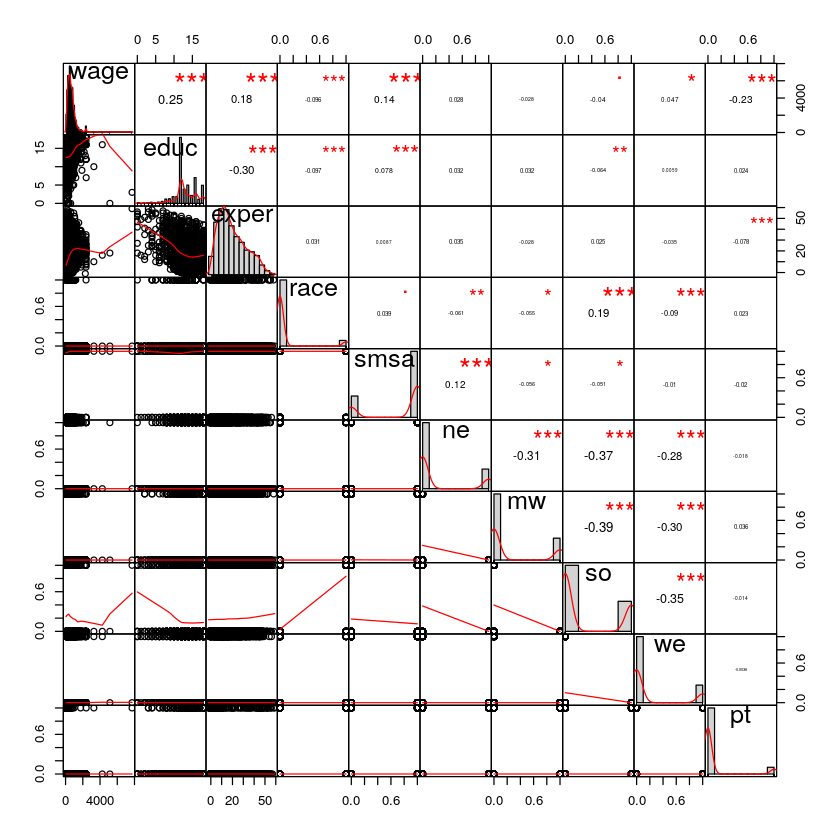

In [7]:
chart.Correlation(uswages)

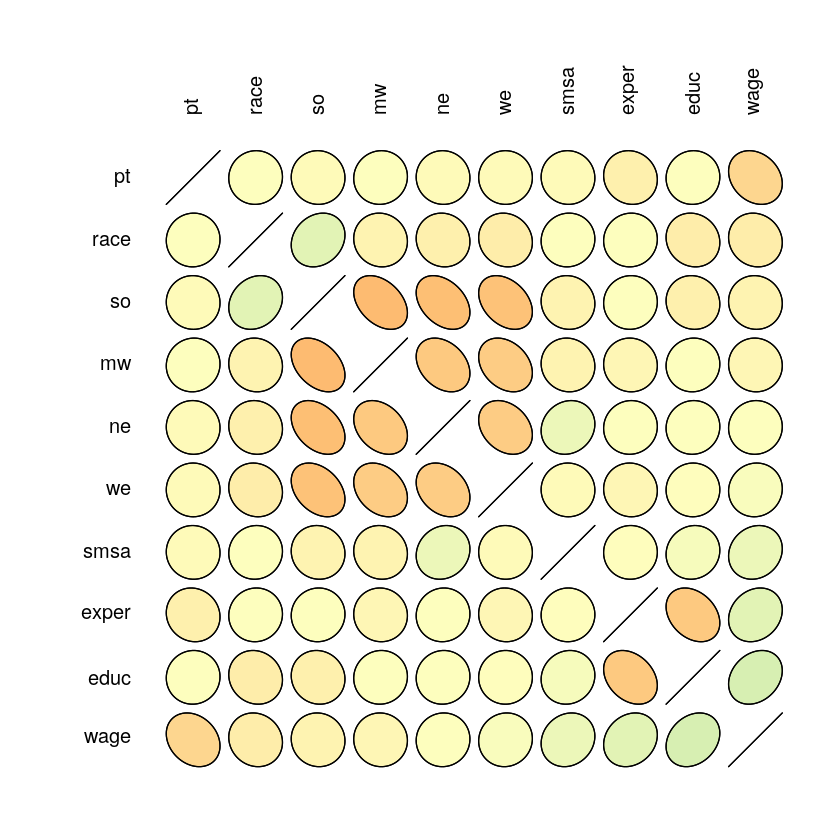

In [8]:
my_colors <- brewer.pal(5, "Spectral")
my_colors=colorRampPalette(my_colors)(100)
data=cor(uswages)

ord <- order(data[1, ])
data_ord = data[ord, ord]
plotcorr(data_ord , col=my_colors[data_ord*50+50] , mar=c(1,1,1,1)  )

##### Comment:
The idea of CORRELATION ELLIPSES is to quickly understand trends between variables.We can notice that there is no strong correlation between the variables.

## Exercise 3

In [9]:
data(sat)
summary(sat)

     expend          ratio           salary          takers     
 Min.   :3.656   Min.   :13.80   Min.   :25.99   Min.   : 4.00  
 1st Qu.:4.882   1st Qu.:15.22   1st Qu.:30.98   1st Qu.: 9.00  
 Median :5.768   Median :16.60   Median :33.29   Median :28.00  
 Mean   :5.905   Mean   :16.86   Mean   :34.83   Mean   :35.24  
 3rd Qu.:6.434   3rd Qu.:17.57   3rd Qu.:38.55   3rd Qu.:63.00  
 Max.   :9.774   Max.   :24.30   Max.   :50.05   Max.   :81.00  
     verbal           math           total       
 Min.   :401.0   Min.   :443.0   Min.   : 844.0  
 1st Qu.:427.2   1st Qu.:474.8   1st Qu.: 897.2  
 Median :448.0   Median :497.5   Median : 945.5  
 Mean   :457.1   Mean   :508.8   Mean   : 965.9  
 3rd Qu.:490.2   3rd Qu.:539.5   3rd Qu.:1032.0  
 Max.   :516.0   Max.   :592.0   Max.   :1107.0  

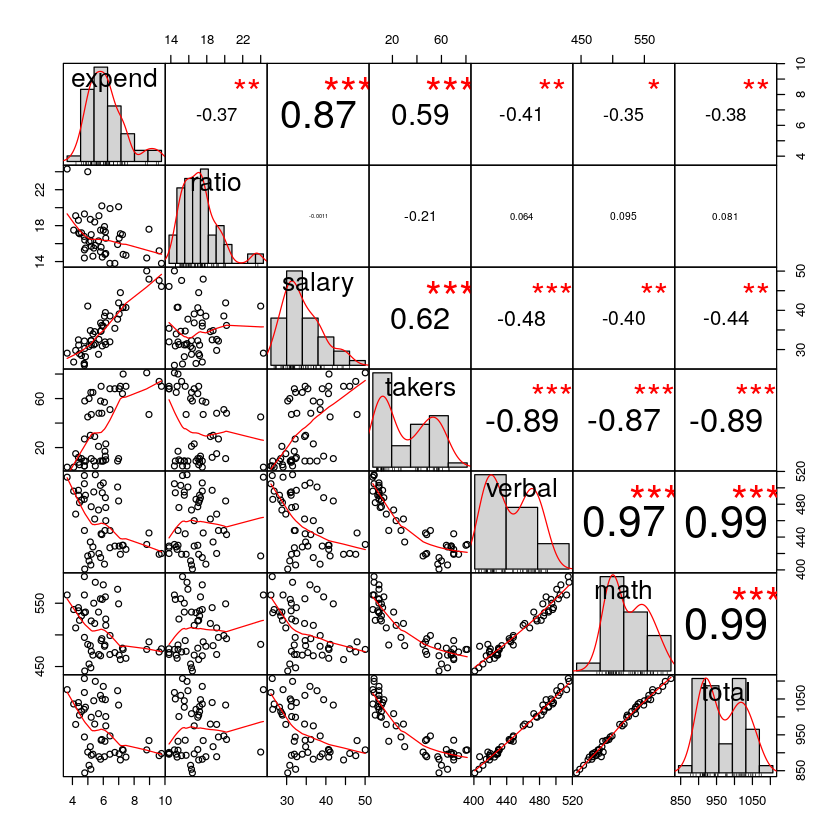

In [10]:
chart.Correlation(sat)

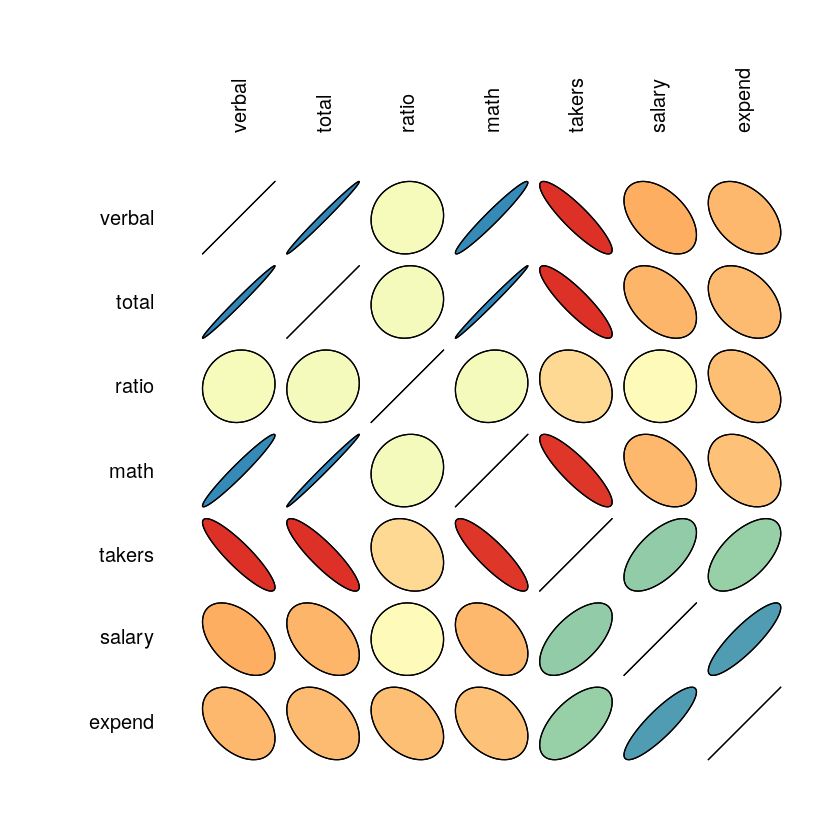

In [11]:
data=cor(sat)

ord <- order(data[1, ])
data_ord = data[ord, ord]
plotcorr(data_ord , col=my_colors[data_ord*50+50] , mar=c(1,1,1,1)  )

## Exercise 4

In [12]:
p0<-1/3
p1 <- 1   
p2 <- 0.5 
p3 <- 0   
p.gold.first <- p0*p1 + p0*p2+ p0*p3# probability that the fisrt extraction is a gold ring = p(G, first) = Sum_i p(G, first|B_i)
p.gold.second.same.box <- 1/2*p1+1/2*p3 # probability that the second extraction is a gold ring within the same box, i.e. given we draw a gold ring (picking either B1 or B2) we pick B1
p.gold.second.different.box <- (1/2*p1+1/2*p3)+(1/2*p2+1/2*p3) # probability that the second extraction is a gold ring by changing box. If we fisrt picked B1, we draw gold with prob. 1/4. If we first picked B2, we draw god w.p. 1/2
cat(paste("Prob. gold first extraction : ",p.gold.first,"\n"))
cat(paste("Prob. gold second extraction keeping : ",p.gold.second.same.box,"\n"))
cat(paste("Prob. gold second extraction changing : ",p.gold.second.different.box,"\n"))

Prob. gold first extraction :  0.5 
Prob. gold second extraction keeping :  0.5 
Prob. gold second extraction changing :  0.75 


## Exercise 5

In [13]:
func.es.5 <- function(x,y,z){y*x^2+z*log(y)+exp(x)}
# u is in the range of minimum maximum variability of the function
bool.func.es.5 <- function(x,y,z,u){ifelse(func.es.5(x,y,z)>u,1,0)}

In [19]:
set.seed(9242)
n<-10000
x<-runif(n,min=-1,max=1)
y<-runif(n,min=3,max=6)
z<-runif(n,min=0,max=2)
max<-round(max(func.es.5(x,y,z)))
min<-round(min(func.es.5(x,y,z))-1)
u<-runif(n,min=min,max=max)
mean.value.method <-12*sum(func.es.5(x,y,z))/n
cat(paste("1) Mean value method : ", mean.value.method ),"\n")
hit.or.miss <-12*(max-min)*sum(bool.func.es.5(x,y,z,u))/n
cat(paste("2) Hit or miss method : ", hit.or.miss ),"\n")

1) Mean value method :  50.3138202404953 
2) Hit or miss method :  49.6656 


## Exercise 6 

In [15]:
bool.area<-function(x,y){ifelse(y>0 & y<1+x&y<exp(-(x-1)^2)&y<1-x,1,0)}

In [16]:
set.seed(324)
n<-1000
x<-runif(n,min=-1,max=1)
y<-runif(n,min=0,max=1)
hit.or.miss<-2*sum(bool.area(x,y))/n
cat(paste(" Hit or miss method : ", hit.or.miss ),"\n")

 Hit or miss method :  0.522 


## Exercise 7 

In [17]:
func.es.7<-function(x,y){ifelse(x>=1/9 & x<=3-(y/3) & y>=sqrt(x) & y<=3,exp(x)+cos(x*y),0)}
func.es.7.bool<-function(x,y,u){ifelse(x>=1/9 & x<=3-(y/3) & y>=sqrt(x) & y<=3 & exp(x)+cos(x*y)>u,1,0)}

In [18]:
n<-1000000
x<-runif(n,min=0, max=3)
y<-runif(n,min=0, max=3)
max<-round(max(func.es.7(x,y)))
min<-round(min(func.es.7(x,y))-1)
u<-runif(n,min=min,max=max)

mean.value.method<- 9*sum(func.es.7(x,y))/n
cat(paste("1) Mean value method : ", mean.value.method ),"\n")

1) Mean value method :  14.7581923216405 
